# Homework 4
## Alex Pine, akp258

### Question 1: Topic modeling code

In [ ]:
# Hack to get python to look for the pip modules before the OS X versions.
# This ensures the newest version of the 'six' library is used, which gensim requires.
import sys
sys.path.insert(0, '/Library/Python/2.7/site-packages')
import gensim

#### 1.a: Prepare document corpus
Using the UC Irvine's "Daily Kos" weblog corpus.

In [65]:
from gensim import corpora, models

corpus = corpora.UciCorpus('docword.kos.txt', fname_vocab='vocab.kos.txt')

#### 1.b Prepare Document Corpus
Train LDA models with default parameters. gensim's LDA module defaults to 100 topics.

In [66]:
# Defaults to num_topics=100
default_model = models.LdaMulticore(corpus, id2word=corpus.create_dictionary(), workers=4)

In [70]:
def print_top_topics(model, num_topics):
    print 'Number of topics:', model.num_topics
    for i, topic in enumerate(default_model.print_topics(num_topics=num_topics, num_words=6)):
        print 'Topic', str(i+1), ':', topic

print_top_topics(default_model, 100)

Number of topics: 100
Topic 1 : 0.013*bush + 0.011*campaign + 0.007*kerry + 0.007*democratic + 0.006*senate + 0.005*time
Topic 2 : 0.016*november + 0.011*bush + 0.008*republicans + 0.008*poll + 0.007*senate + 0.007*house
Topic 3 : 0.014*iraq + 0.011*kerry + 0.010*bush + 0.008*war + 0.005*news + 0.005*campaign
Topic 4 : 0.027*bush + 0.010*kerry + 0.007*war + 0.007*general + 0.006*campaign + 0.005*people
Topic 5 : 0.007*bush + 0.006*iraq + 0.005*campaign + 0.005*democrats + 0.005*senate + 0.004*news
Topic 6 : 0.012*dean + 0.008*iowa + 0.008*kerry + 0.007*campaign + 0.007*bush + 0.007*general
Topic 7 : 0.008*bush + 0.008*democratic + 0.007*war + 0.007*iraq + 0.005*november + 0.005*kerry
Topic 8 : 0.017*bush + 0.013*kerry + 0.008*million + 0.007*republicans + 0.006*administration + 0.005*senate
Topic 9 : 0.008*bush + 0.007*primary + 0.006*states + 0.006*iraq + 0.006*democratic + 0.006*house
Topic 10 : 0.016*bush + 0.009*kerry + 0.007*iraq + 0.007*state + 0.006*war + 0.005*house
Topic 11 : 

##### Analysis
The top five topics have a great deal of overlap. All of them are about the 2004 US presidential election. The first topic refers contains topics words related to electoral politics in general, and a few words specific to that election, such as "marriage" (as in "gay marriage", I assume). The second topic is similar, and the third topic is about presidential challengers "Kerry", "Edwards", and "Dean. All the other topics seem to be minor variations on these themes.

#### 1.c Try different values for num_topics

Trying out the same model with 5, 10, and 20 different topics.

In [293]:
num_topics_list = [5, 10, 20]
for num_topics in num_topics_list:
    model = models.LdaMulticore(corpus, num_topics=num_topics, id2word=corpus.create_dictionary(), workers=4)
    print_top_topics(model, num_topics)

Number of topics: 5
Topic 1 : 0.010*bush + 0.010*republican + 0.007*states + 0.007*republicans + 0.007*senate + 0.006*state
Topic 2 : 0.013*november + 0.010*bush + 0.006*house + 0.005*election + 0.005*poll + 0.005*democratic
Topic 3 : 0.009*war + 0.009*democrats + 0.008*iraq + 0.007*democratic + 0.006*house + 0.006*bush
Topic 4 : 0.012*dean + 0.008*iowa + 0.008*kerry + 0.007*campaign + 0.007*bush + 0.007*general
Topic 5 : 0.019*bush + 0.009*iraq + 0.008*kerry + 0.007*president + 0.006*people + 0.006*war


Number of topics: 10
Topic 1 : 0.009*gotv + 0.008*republicans + 0.008*democratic + 0.008*kerry + 0.008*party + 0.007*dean
Topic 2 : 0.009*kerry + 0.009*bush + 0.008*democratic + 0.007*people + 0.006*democrats + 0.005*party
Topic 3 : 0.009*bush + 0.006*bunning + 0.005*people + 0.005*war + 0.004*poll + 0.004*campaign
Topic 4 : 0.017*bush + 0.013*november + 0.012*kerry + 0.006*poll + 0.005*iraq + 0.005*general
Topic 5 : 0.020*kerry + 0.016*november + 0.011*dean + 0.011*bush + 0.007*war + 0.006*primary
Topic 6 : 0.018*bush + 0.012*kerry + 0.007*iraq + 0.007*war + 0.006*dean + 0.005*poll
Topic 7 : 0.019*kerry + 0.013*bush + 0.008*democratic + 0.008*poll + 0.008*dean + 0.007*edwards
Topic 8 : 0.016*bush + 0.009*kerry + 0.007*percent + 0.007*democratic + 0.006*party + 0.006*democrats
Topic 9 : 0.015*kerry + 0.012*edwards + 0.012*dean + 0.010*democratic + 0.008*primary + 0.008*bush
Topic 10 : 0.018*bush + 0.015*kerry + 0.009*iraq + 0.007*war + 0.007*november + 0.007*poll
Number of topics: 20
T

##### Analysis
I would have expected the topic to become more specific as the number of topics increased, but that doesn't seem to be the case here. The "Daily KOS" is a political blog that focuses on US presidential elections nearly exclusively. As a result, varying the number of topics to search for doesn't have much of an effect--the topics overlap so much as to be nearly identical. They are still all related to the 2004 presidential election.

## Question 4

In [224]:
# Code that reads in data files for question 4

import os

class Doc:
    def __init__(self, num_topics, topic_priors, word_priors):
        self.num_topics = num_topics
        self.topic_priors = topic_priors  # alpha.
        self.word_priors = word_priors  # beta
    

def parse_input_file(filename):
    num_topics = 0
    # Dirichlet hyperparams, aka alphas
    topic_priors = []
    # Beta prior for this document, words are rows, topic probabilities are columns
    word_priors = {}
    
    with open(filename, 'r') as f:
        lines = [line for line in f]
        num_topics = int(lines[0])
        assert(num_topics > 0)
        topic_priors = [float(tok.strip()) for tok in lines[1].split()]
        assert(len(topic_priors) == num_topics)
        for word_index, line in enumerate(lines[2:]): # TODO make this into a matrix
            tokens = line.split()
            word = tokens[0].strip()  # not used
            word_probs = [float(tok.strip()) for tok in tokens[1:]]
            assert(len(word_probs) == num_topics)
            word_priors[word_index] = word_probs
    return num_topics, topic_priors, word_priors


doc = Doc(*parse_input_file('ps4_data/abstract_nips21_NIPS2008_0517.txt.ready'))

In [225]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import mtrand

# Sample a topic probability (theta) for the uncollapsed sampler.
def sample_topic_dist(topic_priors, topics):
    topic_counts = np.bincount(topics, minlength=len(topic_priors))
    posterior_topic_priors = [prior + count
                              for prior, count in zip(topic_priors, topic_counts)]
    return mtrand.dirichlet(posterior_topic_priors)


# Create the posterior probabilities for topics (z) for the uncollapsed sampler.
def sample_posterior_topic(word_index, word_priors, topic_dist):
    posterior_topic_probs = []
    denominator = 0.0
    word_prior_list = word_priors[word_index]
    for topic_index in range(len(topic_dist)):
        numerator = word_prior_list[topic_index] * topic_dist[topic_index] 
        posterior_topic_probs.append(numerator)
        denominator += numerator
    posterior_topic_probs = [prob/denominator for prob in posterior_topic_probs]
    topic_counts = mtrand.multinomial(1, posterior_topic_probs)
    for topic_index, sample_value in enumerate(topic_counts):
        if sample_value == 1:
            return topic_index
    raise Exception('Error occured while sampling topic')
    

# Returns an array of topic distribution samples
def uncollapsed_gibbs_sampler(doc, num_iterations):
    # Initialize the topic_dist and topics to dummy values to start.
    initial_topic_dist = [1.0/doc.num_topics]*num_topics
    initial_topics = [1]*len(doc.word_priors)
    topic_dist_samples = [initial_topic_dist]
    topic_samples = [initial_topics]
    
    for iteration in range(num_iterations):
        prev_topics = topic_samples[-1]
        # Sample topic distribution (theta)
        topic_dist_sample = sample_topic_dist(doc.topic_priors, prev_topics)
        # Initialize the topic sample to be the sample as the last one
        topics_sample = list(prev_topics)
        for i in range(len(topics_sample)):
            # Sample each topic instantiation (z_{mn})
            topics_sample[i] = sample_posterior_topic(i, doc.word_priors, 
                                                      topic_dist_sample)    
        topic_dist_samples.append(topic_dist_sample)
        topic_samples.append(topics_sample)
    # Remove the 'burn' samples
    topic_dist_samples = topic_dist_samples[50:]
    return np.array(topic_dist_samples)


def uncollapsed_expected_value(samples):
    return np.mean(samples, axis=0)

In [290]:
# Uncollapsed topic distribution samples
u_topic_dist_samples = uncollapsed_gibbs_sampler(doc, 10000)

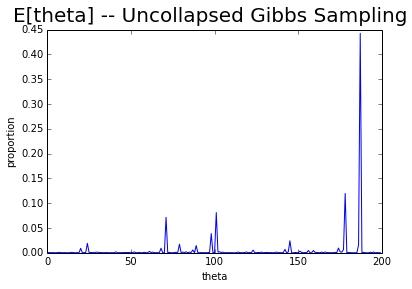

In [292]:
u_topic_dist = uncollapsed_expected_value(u_topic_dist_samples)
fig = plt.figure()
fig.suptitle('E[theta] -- Uncollapsed Gibbs Sampling', fontsize=20)
plt.xlabel('theta')
plt.ylabel('proportion')
plt.plot(range(len(u_topic_dist)), u_topic_dist)
plt.show()

In [254]:
# Collapsed Gibbs Sampling

# Conditional probability of 
def sample_posterior_topic_collapsed(word_index, topic_sample, word_priors, topic_priors):
    # Bucket topic samples, excluding the current topic sample
    topic_counts = [0]*len(topic_priors)
    for i, topic in enumerate(topic_sample):
        if i != word_index:
            topic_counts[topic] += 1
    # Compute each posterior topic probability
    posterior_topic_probs = []
    for topic_index in range(len(topic_priors)):
        word_prior = word_priors[word_index][topic_index]
        topic_prior = topic_priors[topic_index]
        topic_count = topic_counts[topic_index]
        prob = word_prior * (topic_prior + topic_count)
        posterior_topic_probs.append(prob)
    normalizer = sum(posterior_topic_probs)
    posterior_topic_probs = [prob/normalizer for prob in posterior_topic_probs]
    # Sample from the distribution
    sample = mtrand.multinomial(1, posterior_topic_probs)
    for topic_index, sample_value in enumerate(sample):
        if sample_value == 1:
            return topic_index
    raise Exception('Error occured while sampling topic')
    
    
# Returns an array of topic samples
def collapsed_gibbs_sampler(doc, num_iterations):
    # Initialize the topics to dummy values to start.
    initial_topics = [1]*len(doc.word_priors)
    topic_samples = [initial_topics]
    for iteration in range(num_iterations):
        topic_sample = list(topic_samples[-1])
        for i in range(len(topic_sample)):
            # Sample each topic instantiation (z_{mn})
            topic_sample[i] = sample_posterior_topic_collapsed(
                i, topic_sample, doc.word_priors, doc.topic_priors)
        topic_samples.append(topic_sample)
    # Remove the 'burn' samples
    topic_samples = topic_samples[50:]
    return np.array(topic_samples)


def collapsed_expected_topic_dist(topic_samples, topic_priors):
    T = len(topic_samples)
    topic_dist = np.zeros(len(topic_priors))
    for topic_sample in topic_samples:
        topic_dist += np.bincount(topic_sample, minlength=len(topic_priors))
    N = len(topic_samples[0])
    topic_dist += np.array([N*topic_prior for topic_prior in topic_priors])
    topic_dist /= T * (sum(topic_priors) + N)
    return topic_dist

In [260]:
# Collapsed topic distribution samples
c_topic_samples = collapsed_gibbs_sampler(doc, 10000)

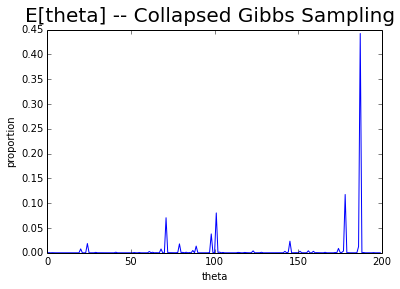

In [288]:
c_topic_dist = collapsed_expected_topic_dist(c_topic_samples, doc.topic_priors)
fig = plt.figure()
fig.suptitle('E[theta] -- Collapsed Gibbs Sampling', fontsize=20)
plt.xlabel('theta')
plt.ylabel('proportion')
plt.plot(range(len(c_topic_dist)), c_topic_dist)
plt.show()

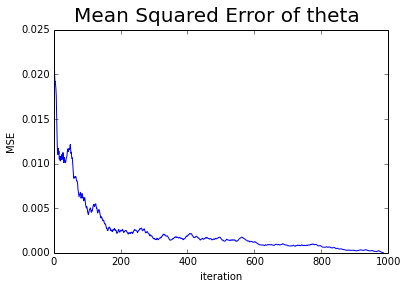

In [285]:
import math

def plot_error(samples, start_num_iterations, topic_priors):
    assert(start_num_iterations < len(samples))
    gt_topic_dist = collapsed_expected_topic_dist(samples, topic_priors)
    errors = []
    for i in range(start_num_iterations, len(samples), 10):
        tmp_topic_dist = collapsed_expected_topic_dist(samples[:i], topic_priors)
        error = math.sqrt(sum((gt_topic_dist - tmp_topic_dist)**2))
        errors.append(error)
    fig = plt.figure()
    fig.suptitle('Mean Squared Error of theta', fontsize=20)
    plt.xlabel('iteration')
    plt.ylabel('MSE')
    plt.plot(range(len(errors)), errors)
    plt.show()

plot_error(c_topic_samples, 100, doc.topic_priors)